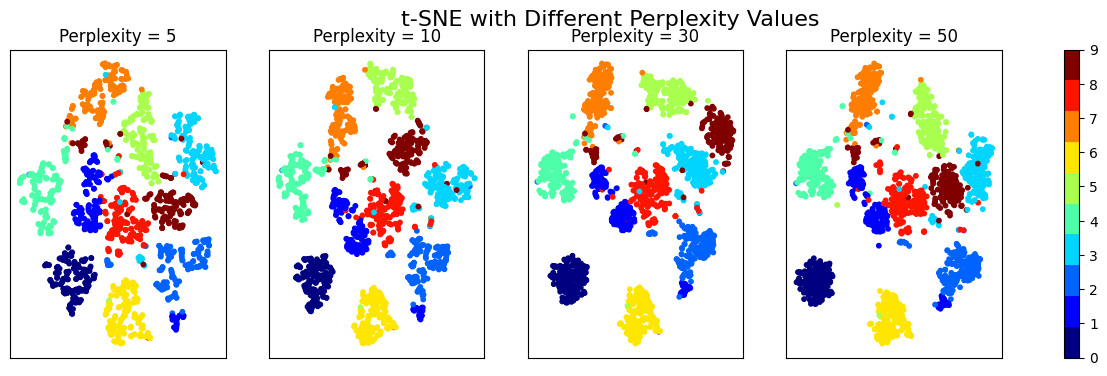

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Load the digits dataset
# This dataset contains 8x8 pixel images of handwritten digits (0-9).
digits = load_digits()
X = digits.data
y = digits.target

# --- Step 1: Data Scaling ---
# t-SNE relies on distances, so features must be scaled to prevent
# features with large ranges from dominating the result.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 2: Perplexity Exploration ---
# We will test a few different values for perplexity to see how it affects the visualization.
# Perplexity relates to the number of nearest neighbors considered for each point.
# A typical range is 5-50.
perplexities_to_try = [5, 10, 30, 50]

# Setup for plotting
fig, axes = plt.subplots(1, len(perplexities_to_try), figsize=(16, 4))
fig.suptitle('t-SNE with Different Perplexity Values', fontsize=16)

# Create a manual grid search loop
for i, perplexity in enumerate(perplexities_to_try):
    # Initialize t-SNE with the current perplexity
    # `random_state` is set for reproducibility.
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
    
    # Fit and transform the scaled data
    X_tsne = tsne.fit_transform(X_scaled)
    
    # Create a scatter plot of the result
    ax = axes[i]
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.get_cmap("jet", 10), s=10)
    ax.set_title(f'Perplexity = {perplexity}')
    ax.set_xticks([])
    ax.set_yticks([])

# Add a colorbar to the plot
fig.colorbar(scatter, ax=axes, ticks=range(10))
plt.show()